# Sine wave example

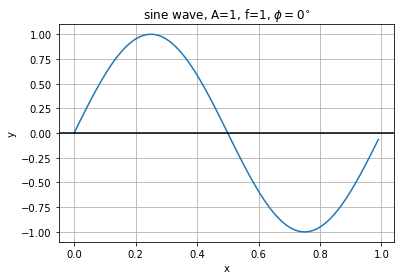

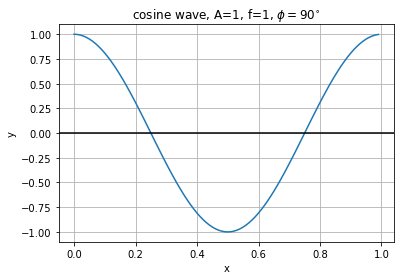

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plot

def plot_wave(A,f,phi,name='',color='g'):
    plot.clf()
    x = np.arange(0, 1, 0.01);
    y  = A*np.sin(2*np.pi*f*x + np.pi/180*phi)
    plot.plot(x,y)
    plot.xlabel('x')
    plot.ylabel('y')
    plot.title(name)
    plot.grid(True, which='both') 
    plot.axhline(y=0, color='k') 
    plot.show()
    
plot_wave(1,1,0,'sine wave, A=1, f=1, $\phi=0^{\circ}$')
plot_wave(1,1,90,'cosine wave, A=1, f=1, $\phi=90^{\circ}$')



# Demostration of the classical Discrete Fourier Transform

The real parts are the cosine terms, the imaginary parts the sine terms. 

The spectral power graph shows us the power in each frequency.

In [2]:
sampling_rate = 100                          # the number of samples per second
time_interval=2                              # the amount of time to sample for
n_samples = int(sampling_rate*time_interval) # the number of total samples given the previous parameters
def wave(A,f,phi):
    """x will be an array sampling on the range 0 to T at every sampling_interval which is n_samples long
    y will be the value of a wave with Amplitude A, frequency f and phase phi along that interval sampled at each x"""
    sampling_interval = 1/sampling_rate     # the interval between samples
    x = np.arange(0, time_interval, sampling_interval);
    y  = A*np.sin(2*np.pi*f*x + np.pi/180*phi)
    return y
    
green_wave=wave(10,0.5,0)
blue_wave=wave(0.75,15,90)
red_wave=green_wave+blue_wave

from numpy import fft
fft_wave = fft.fft(red_wave)/n_samples # compute and normalize the FFT
frequencies_tried=np.arange(n_samples)/time_interval
amplitude=2*np.absolute(fft_wave)
half_range=range(int(n_samples/2))
for f,a in zip(frequencies_tried[half_range],amplitude[half_range]):
    if a>1e-6: # ignore those coefficients which are so small, so as to be numerical noise
        print("the amplitude at f=%.2f is A=%.2f"%(f,a))


the amplitude at f=0.50 is A=10.00
the amplitude at f=15.00 is A=0.75


In [3]:
def Rk(k):
    return np.matrix([[1,0][0,np.e**(2*np.pi*1j/2**k)]])

In [4]:
def CRk(k):
    return np.matrix([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,np.e**(2*np.pi*1j/2**k)]])


# QFT one qubit

In [5]:
import qiskit
from qiskit import Aer
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
qr = QuantumRegister(1)
cr = ClassicalRegister(1)
circuit = QuantumCircuit(qr, cr)
circuit.h(qr[0])
circuit.measure(qr[0],cr[0])
# Run on local simulator
backend = Aer.get_backend('qasm_simulator')
sim = qiskit.execute(circuit,backend=backend)
result = sim.result()
print(result.get_counts(circuit))

/Users/corbett/Documents/Mastering-Quantum-Computing-with-IBM-QX/book/lib/python3.7/site-packages/marshmallow/schema.py:364: ChangedInMarshmallow3Warning: strict=False is not recommended. In marshmallow 3.0, schemas will always be strict. See https://marshmallow.readthedocs.io/en/latest/upgrading.html#schemas-are-always-strict
  ChangedInMarshmallow3Warning


{'0': 536, '1': 488}


# QFT two qubits

In [6]:
import math
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
circuit = QuantumCircuit(qr, cr)
circuit.h(qr[0])
circuit.cu1(math.pi/2.,qr[1],qr[0])
circuit.draw()


# QFT three qubits

In [7]:
import math
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
qr = QuantumRegister(3)
cr = ClassicalRegister(3)
circuit = QuantumCircuit(qr, cr)
circuit.h(qr[0])
circuit.cu1(math.pi/2.,qr[1],qr[0])
circuit.cu1(math.pi/4.,qr[2],qr[0])
circuit.h(qr[1])
circuit.cu1(math.pi/2.,qr[2],qr[1])
circuit.h(qr[2])
circuit.draw()


# QFT N qubits

In [8]:
def qft(qr,qc,n_qubits):
    # Get the circuit and the quantum register by name
    for i in range(n_qubits):
        for j in range(i):
            qc.cu1(math.pi/float(2**(i-j)), qr[i], qr[j])
        qc.h(qr[i])